## Install

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 69 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,170 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## Import

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
with open("./meta_list.json",'r') as f:
  meta_data = json.load(f)

## genre distribution

In [ ]:
genre_list = []
for genre in meta_data['album_genre'].values():
  genre_items = list(map(str.strip,genre.split(',')))
  genre_list.extend(genre_items)
genre_count_dict = Counter(genre_list)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(

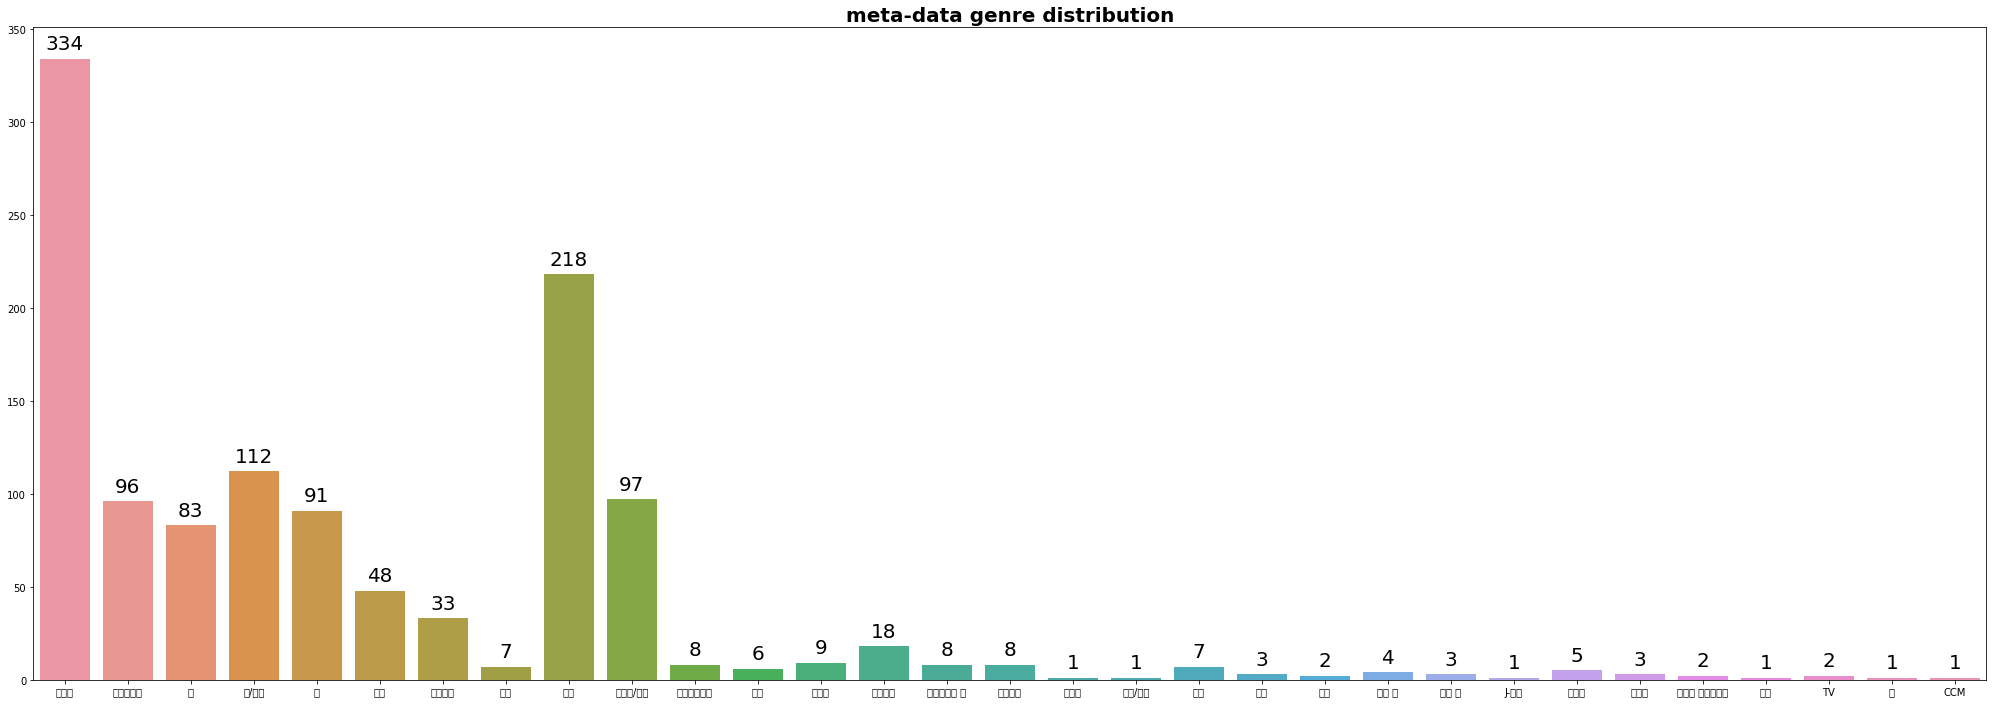

In [ ]:
x = list(genre_count_dict.keys())
y = list(genre_count_dict.values())
plt.figure(figsize=(35,12))
ax = sns.barplot(x=x,y=y)
ax.set_title("meta-data genre distribution",fontdict={"fontsize":20,"fontweight":"bold"})
for i, v in enumerate(y):
    ax.text(i, v+5, str(v), fontdict={"fontsize":20},ha='center')
plt.show()

## lyric length

In [ ]:
lyric_len_list = []
for lyric in meta_data['lyric'].values():
  if lyric is None:
    lyric_len = 0
  else:
    lyric_len = len(lyric)
  lyric_len_list.append(lyric_len)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


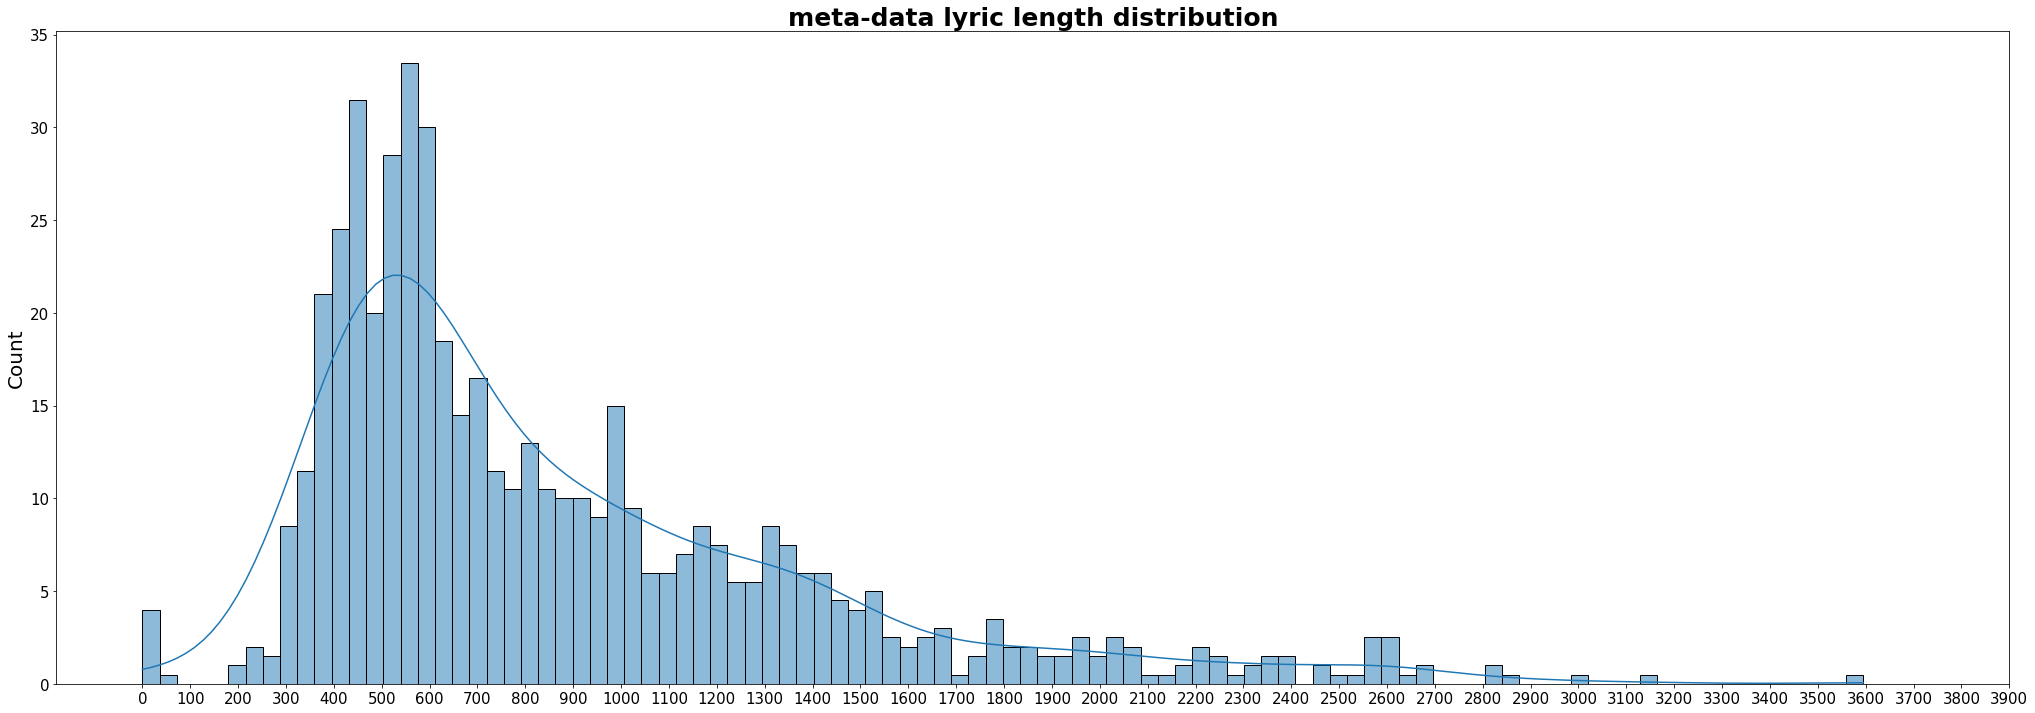

In [ ]:
plt.figure(figsize=(35,12))
ax = sns.histplot(lyric_len_list,bins=100,kde=True)
ax.set_title("meta-data lyric length distribution",fontdict={"fontsize":25,"fontweight":"bold"})
ax.set_xticks(ticks=np.arange(0,4000,100))
ax.set_xticklabels(labels=np.arange(0,4000,100),fontdict={"fontsize":15})
ax.set_yticklabels(labels=np.arange(0,80,5),fontdict={"fontsize":15})
ax.set_ylabel(ylabel="Count",fontdict={"fontsize":20})
plt.show()

## No lyric items

In [ ]:
meta_data.keys()

dict_keys(['album_genre', 'album_title', 'artists', 'has_lyric', 'lyric', 'play_time', 'release_date', 'track_id', 'track_title'])

In [ ]:
no_lyric_key = []
for key,has_lyric in meta_data['has_lyric'].items():
  if not has_lyric:
    no_lyric_key.append(key)
    print("NO lyric.")
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print()

NO lyric.
title : Last Carnival
artist : ['Acoustic Cafe']

NO lyric.
title : River Flows In You
artist : ['이루마']

NO lyric.
title : 봄바람
artist : ['버스커 버스커']

NO lyric.
title : Kiss The Rain
artist : ['이루마']

NO lyric.
title : Salut D'Amour (Edward Elgar)
artist : ['Yuhki Kuramoto']

NO lyric.
title : Romance
artist : ['Yuhki Kuramoto']

NO lyric.
title : 세상의 약속 (하울의 움직이는 성)
artist : ['Elizabeth Bright']



## short lyric items

In [ ]:
min_lyric_len=200
short_lyric_key = []
print("SHORT lyric.")
for key,lyric in meta_data['lyric'].items():
  if lyric is None:
    continue
  if len(lyric)<=min_lyric_len:
    short_lyric_key.append(key)
    print('='*100)
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print("lyric : {}".format(lyric))
    print()

SHORT lyric.
title : 인생의 회전목마 (하울의 움직이는 성)
artist : ['Elizabeth Bright']
lyric : 가사 준비중입니다...

title : 언제나 몇 번이라도 (센과 치히로의 행방불명)
artist : ['Elizabeth Bright']
lyric : 언제나 몇 번이라도 (센과 치히로의 행방불명) / Elizabeth Bright



In [ ]:
max_lyric_len=3000
long_lyric_key = []
print("SHORT lyric.")
for key,lyric in meta_data['lyric'].items():
  if lyric is None:
    continue
  if len(lyric)>=max_lyric_len:
    long_lyric_key.append(key)
    print('='*100)
    print("title : {}".format(meta_data['track_title'][key]))
    print("artist : {}".format(meta_data['artists'][key]))
    print("lyric : {}".format(lyric))
    print()

SHORT lyric.
title : Shape of You
artist : ['Ed Sheeran']
lyric : The club isn't the best place to find a lover
So the bar is where I go
Me and my friends at the table doing shots
Drinking fast and then we talk slow
And you come over and start up a conversation with just me
And trust me I'll give it a chance now
Take my hand, stop, put Van the Man on the jukebox
And then we start to dance, and now I'm singing like

Girl, you know I want your love
Your love was handmade for somebody like me
Come on now, follow my lead
I may be crazy, don't mind me
Say, boy, let's not talk too much
Grab on my waist and put that body on me
Come on now, follow my lead
Come, come on now, follow my lead

I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body
And last night you were in my room
And now my bedsheets smell like you
Every day discovering something brand new
I'm in love with your body
Oh-I-oh-I-oh-I-oh-I
I'm in love with your

## 형태소 비교

In [ ]:
!pip install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
from konlpy.tag import Mecab,Twitter,Hannanum, Kkma, Komoran

In [ ]:
def isInKorean(input_s):
  for c in input_s:
      if ord('가') <= ord(c) <= ord('힣'):
          return 1
  return 0

In [ ]:
tagging = [Mecab(),Twitter(), Hannanum(),Kkma()]
result=[[] for _ in range(4)]

for key,lyric in tqdm.tqdm_notebook(meta_data['lyric'].items()):
  if lyric is None or len(lyric)<200 or not isInKorean(lyric):
    continue
  for i,tag in enumerate(tagging):
    tokenized_doc = tag.pos(lyric)
    result[i].append(tokenized_doc)

lyrics_list = list(meta_data['lyric'].values())
for i in range(10):
  print("target : ",lyrics_list[i])
  print("mecab :")
  print(result[0][i])
  print()

  print("twitter :")
  print(result[1][i])
  print()

  print("hannanum :")
  print(result[2][i])
  print()

  print("Kkma :")
  print(result[3][i])
  print()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1013 [00:00<?, ?it/s]